### CNN Training in Time Domain

In [ ]:
import preprocessor.time_preprocessor as preprocessor
X_train, y_train, X_val, y_val, X_test, y_test = preprocessor.preprocess(True, True, True)
print(X_train.shape)

Load CNN model

In [2]:
from ia.model.cnn.time_cnn import TimeCNN
time_cnn = TimeCNN(input_shape=(X_train[0].shape))

In [3]:
time_cnn.compile()

In [4]:
NR_EPOCHS = 100
BATCH_SIZE = 250

In [5]:
history = time_cnn.fit(X_train, y_train, num_epochs=NR_EPOCHS, batch_size=BATCH_SIZE, val_data=X_val, val_labels=y_val)

Epoch 1/100
11/11 [==============================] - 1s 45ms/step - loss: 0.7120 - accuracy: 0.4977 - val_loss: 0.6933 - val_accuracy: 0.5097
Epoch 2/100
11/11 [==============================] - 0s 26ms/step - loss: 0.6958 - accuracy: 0.4947 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/100
11/11 [==============================] - 0s 27ms/step - loss: 0.6948 - accuracy: 0.4894 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 4/100
11/11 [==============================] - 0s 27ms/step - loss: 0.6918 - accuracy: 0.5106 - val_loss: 0.6921 - val_accuracy: 0.5215
Epoch 5/100
11/11 [==============================] - 0s 25ms/step - loss: 0.6928 - accuracy: 0.5159 - val_loss: 0.6912 - val_accuracy: 0.6234
Epoch 6/100
11/11 [==============================] - 0s 27ms/step - loss: 0.6907 - accuracy: 0.5390 - val_loss: 0.6897 - val_accuracy: 0.5215
Epoch 7/100
11/11 [==============================] - 0s 27ms/step - loss: 0.6888 - accuracy: 0.5696 - val_loss: 0.6881 - val_accuracy: 0.5032
Epoch 

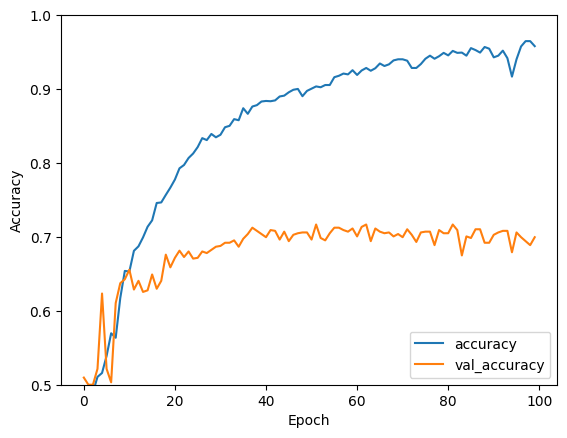

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [7]:
time_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 32)            122912    
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 32)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                        

In [8]:
import numpy as np
predictions = time_cnn.model.predict(X_test)
predictions = np.array([prediction > 0.5 for prediction in predictions])

for i in range(len(y_test)):
    print("PREDICTION: " + str(predictions[i]) + " | " +  "REAL: " + str(y_test[i]))

3/3 [==============================] - 0s 0s/step
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: Fals

In [9]:
test_loss, test_acc = time_cnn.model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

3/3 [==============================] - 0s 2ms/step - loss: 1.1338 - accuracy: 0.7368
Test accuracy: 0.7368420958518982
Test loss: 1.1338375806808472


### Metrics:

In [10]:
from ia.metrics.metrics import Metrics
metrics = Metrics(y_test, predictions, time_cnn.name(), "time")
metrics.all_metrics()
metrics.metrics_to_database()

True Positives: 33
True Negatives: 23
False Positives: 5
False Negatives: 15
total Samples: 76
Accuracy: 0.7368421052631579
Precision: 0.868421052631579
Sensitivity: 0.6875
Specificity: 0.8214285714285714
TPR: 0.868421052631579
FPR: 0.17857142857142858
F1-Score: 0.7113163972286374


ROC curve

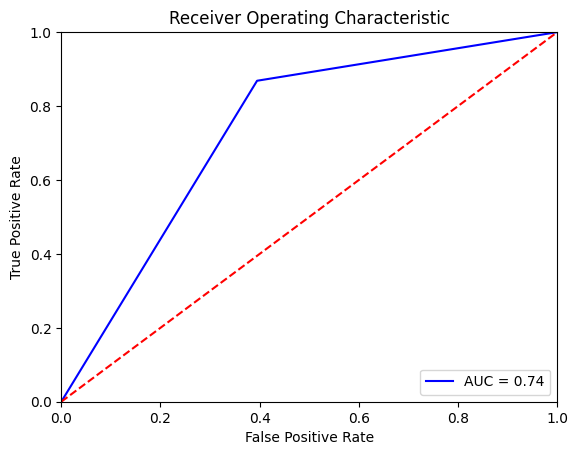

In [11]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()